Index(['cgpa', 'package'], dtype='object')


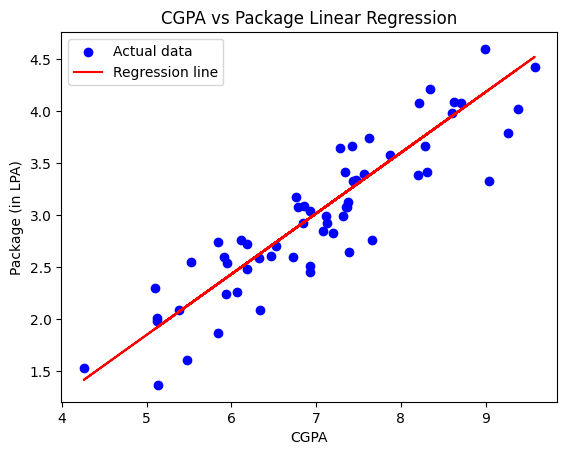

[[0.58365435]]
[-1.0675116]
MAE: 0.2544584633379211
MSE: 0.10200870451918727
RMSE: 0.31938801561609553
R-squared: 0.803734164647173


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


placement_df = pd.read_csv('/content/placement.csv')
print(placement_df.columns)
# print(placement_df)
X = placement_df[['cgpa']]
# print(X.shape)
Y = placement_df[['package']]
# print(Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 5)

model = LinearRegression()
model.fit(X_train,Y_train)

predictions = model.predict(X_test)
print(predictions)


# Plot the data and the regression line
plt.scatter(X_test, Y_test, color='blue', label='Actual data')
plt.plot(X_test, predictions, color='red', label='Regression line')
plt.xlabel('CGPA')
plt.ylabel('Package (in LPA)')
plt.title('CGPA vs Package Linear Regression')
plt.legend()
plt.show()


print(model.coef_)
print(model.intercept_)

mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")



Model Evaluation and Interpretation
This section provides an analysis of the linear regression model's performance by examining key metrics:

R-squared (R²)
Value: 0.8037 (or 80.4%)
Interpretation: This indicates that approximately 80.4% of the variance in the target variable ('package', presumably representing salary or package offered) can be explained by the linear relationship with the feature 'cgpa' (Cumulative Grade Point Average).
Is it good?

Generally, an R-squared value of 0.80 is considered quite good for a simple linear regression model in fields like social sciences and business. It suggests a relatively strong linear association between CGPA and the placement package, with the model capturing a large portion of the data's variability.

Important Considerations:

"Good" is relative and depends on the specific domain. In physics or engineering, higher R-squared values (e.g., > 0.95) might be expected. In fields with noisy data, even an R-squared of 0.5 might be considered acceptable.
For a typical dataset like placement data, 0.80 is a solid result.
Error Metrics
MAE (Mean Absolute Error): 0.254

Interpretation: On average, the model's prediction is about 0.254 units away from the actual value.
MSE (Mean Squared Error): 0.102

Interpretation: Harder to interpret directly due to squared units, but lower is better. Primarily used for optimization purposes.
RMSE (Root Mean Squared Error): 0.319

Interpretation: Represents the typical magnitude of the prediction error in the same units as the target variable ('package').
Are they good?

The quality of these error metrics depends entirely on the scale and units of the target variable ('package').

Example 1: 'package' in Lakhs Per Annum (LPA)

An RMSE of 0.319 means the typical prediction error is about 0.319 LPA, or roughly 31,900 Rupees per year. This might be considered a reasonable error for an entry-level placement prediction model.
The MAE suggests an average absolute error of 0.254 LPA (~25,400 Rupees).
Example 2: 'package' on a scale of 1 to 10

An RMSE of 0.319 on this scale would also be considered quite good.
Example 3: 'package' in actual Rupees

An RMSE of 0.319 Rupees would be incredibly (and unrealistically) good.
Overall Conclusion
Based on the R-squared value of 0.804 and the error metrics, the linear regression model appears to have captured a significant portion of the relationship between CGPA and placement package. This is generally a good score.

To fully assess the error metrics' suitability, consider the specific context of the placement data and the acceptable level of error for prediction purposes.

0.5836543481812938
-1.067511604028942


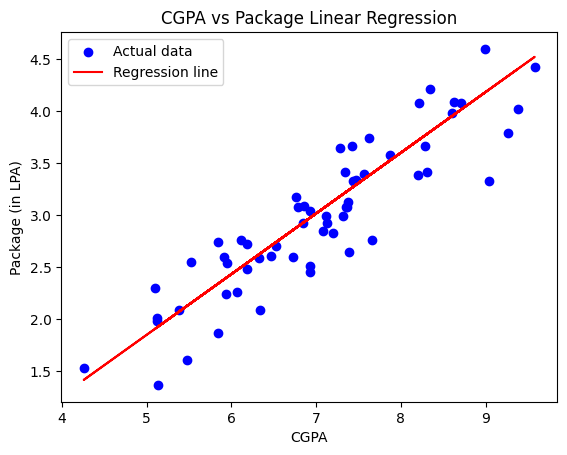

MAE: 0.2544584633379211
MSE: 0.10200870451918725
RMSE: 0.3193880156160955
R-squared: 0.803734164647173


In [ ]:
import statistics


class LinearRegression:
  def __init__(self):
    self.m = 0
    self.b = 0

  def fit(self,X_train,Y_train):
    num = 0
    den = 0
    for i in range(len(X_train)):
      num += (X_train[i] - np.mean(X_train)) * (Y_train[i] - np.mean(Y_train))
      den += (X_train[i] - np.mean(X_train))**2

    self.m = num/den
    self.b = np.mean(Y_train) - (self.m * np.mean(X_train))
    print(self.m)
    print(self.b)

  def predict(self,X_test):
    predictions = []
    for i in range(len(X_test)):
      predictions.append(self.m * X_test[i] + self.b)
    return predictions


X = placement_df['cgpa'].values
# print(X.shape)
Y = placement_df['package'].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 5)

model = LinearRegression()
model.fit(X_train,Y_train)
predictions = model.predict(X_test)

# for prediction in predictions:
#   print(prediction)

plt.scatter(X_test, Y_test, color='blue', label='Actual data')
plt.plot(X_test, predictions, color='red', label='Regression line')
plt.xlabel('CGPA')
plt.ylabel('Package (in LPA)')
plt.title('CGPA vs Package Linear Regression')
plt.legend()
plt.show()



mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")
